<a href="https://colab.research.google.com/github/reshmi416/PRODIGYINFOTECH_DS_3/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male  

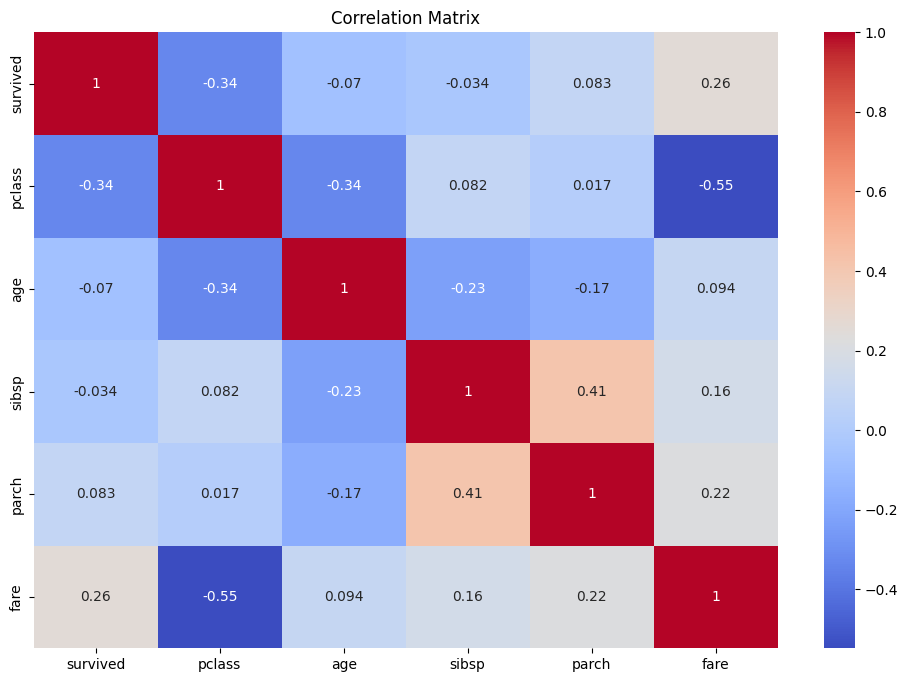

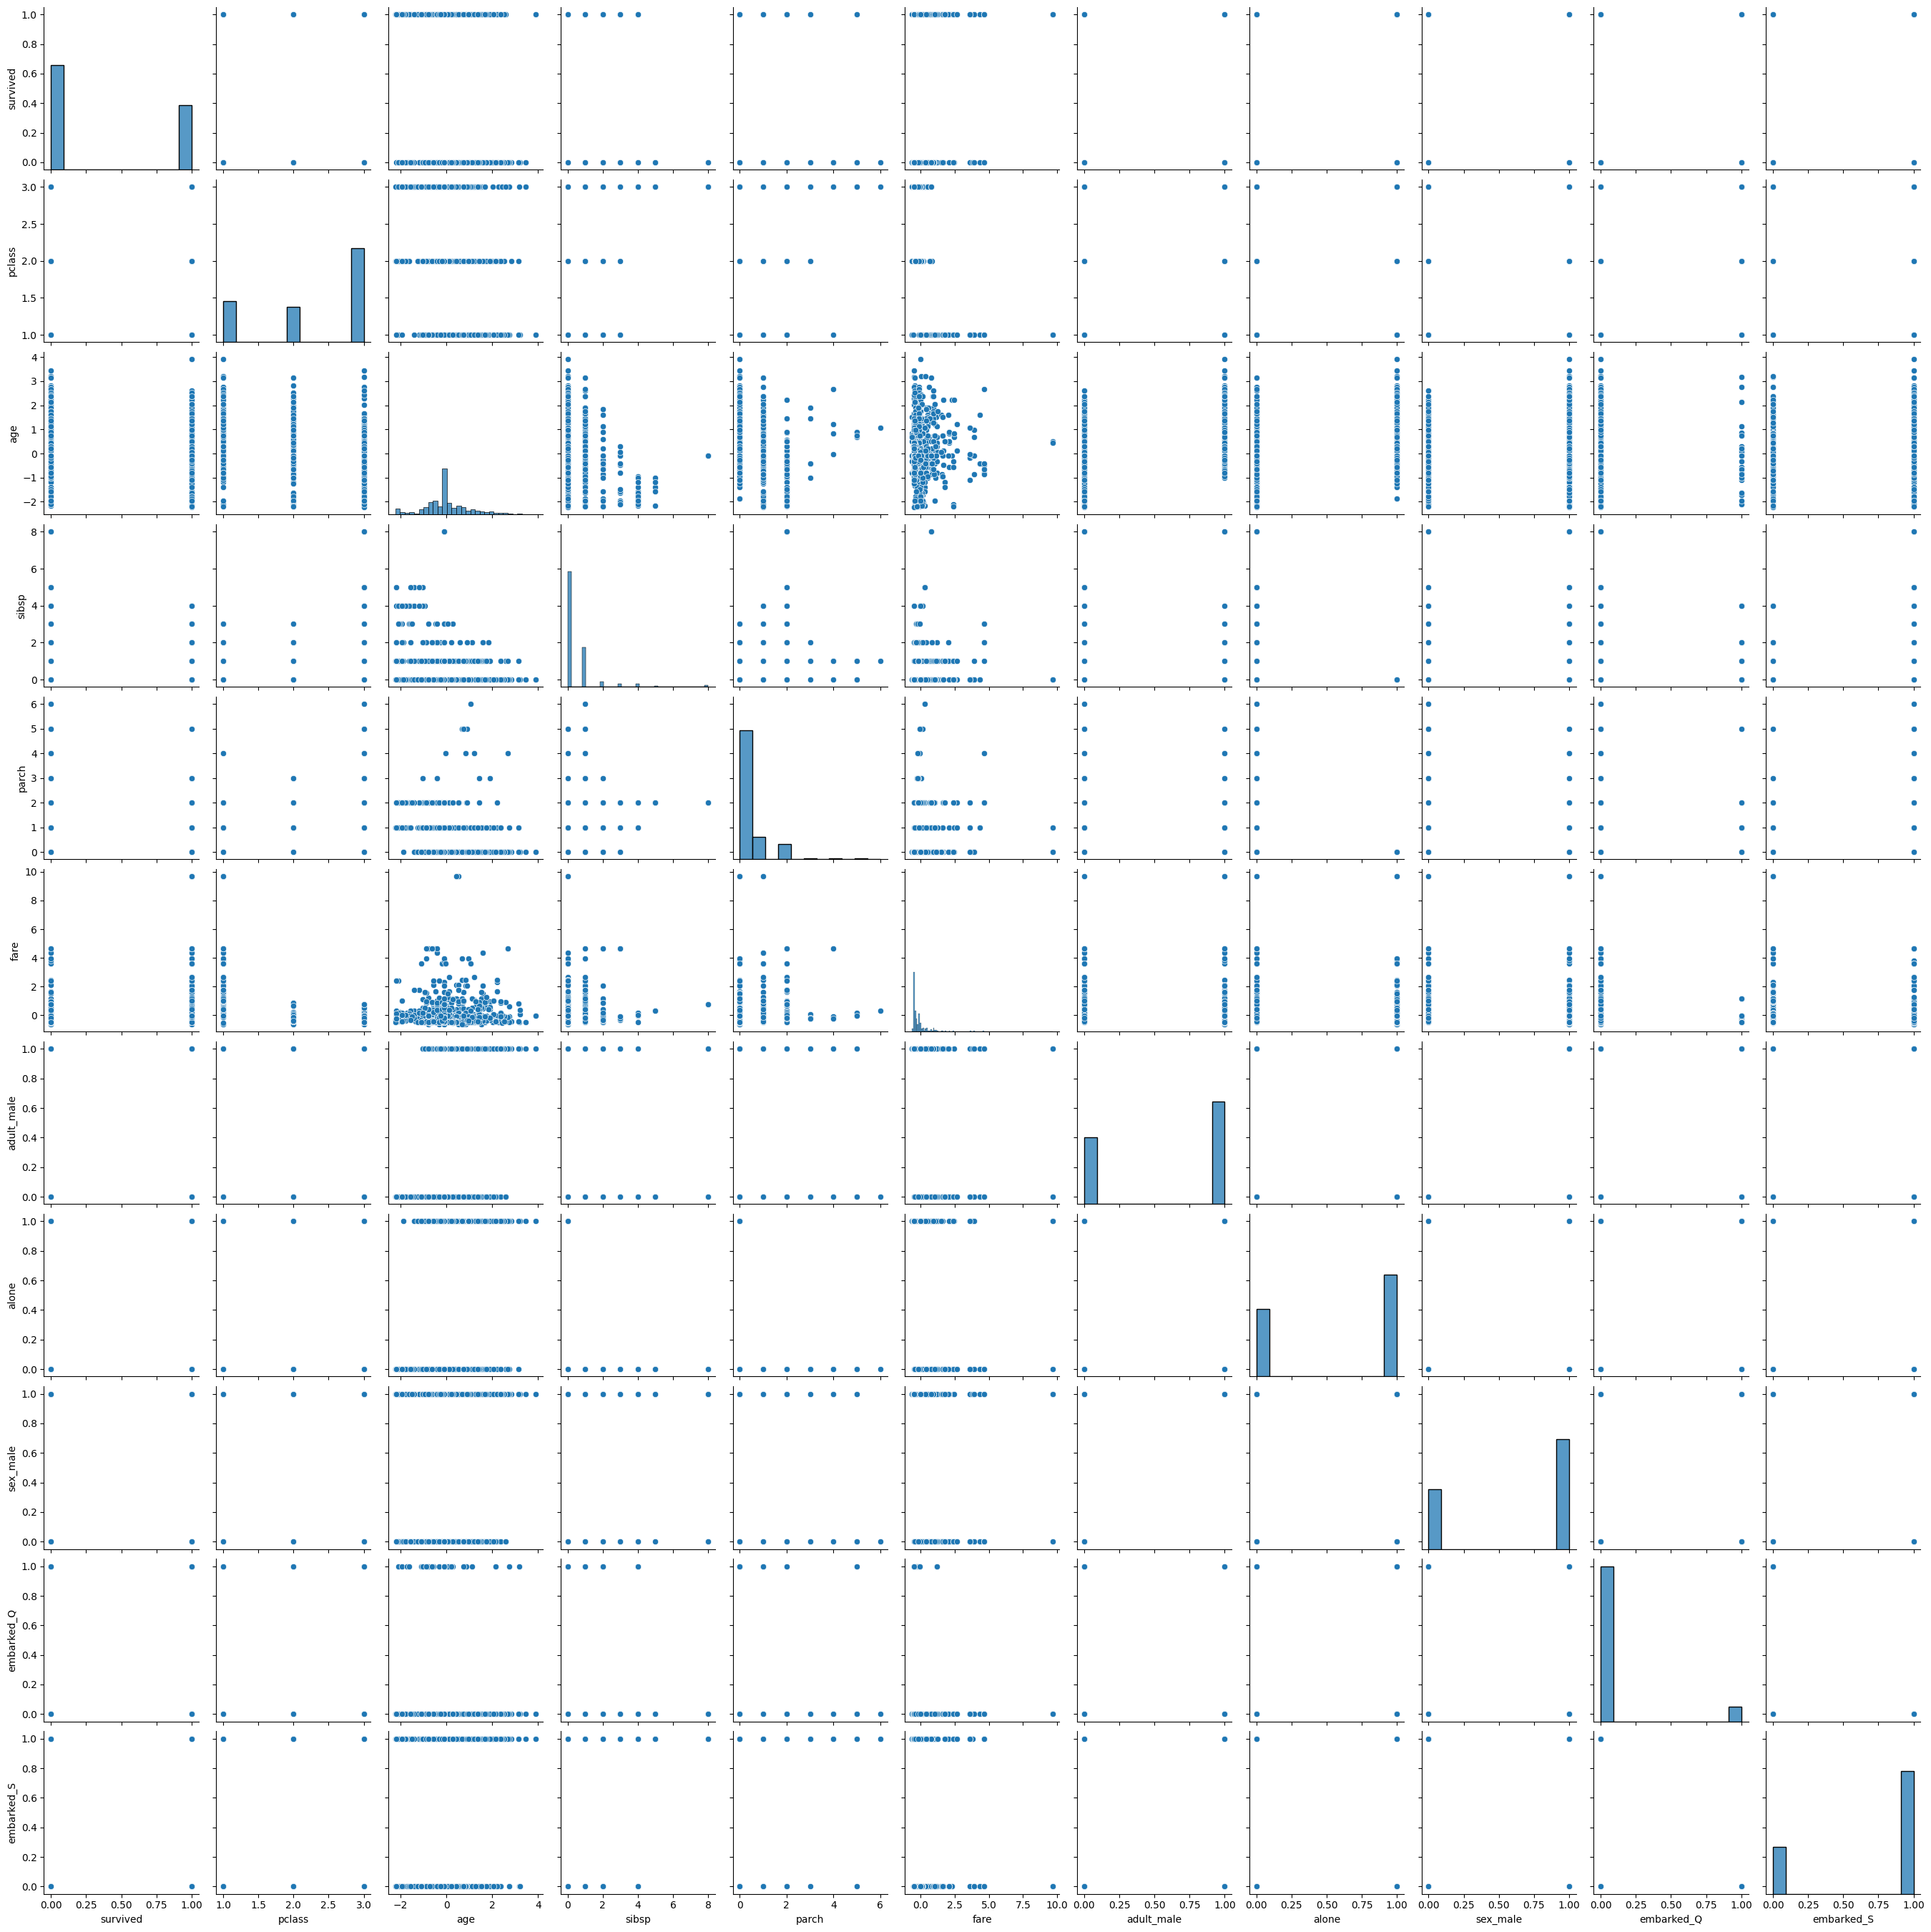

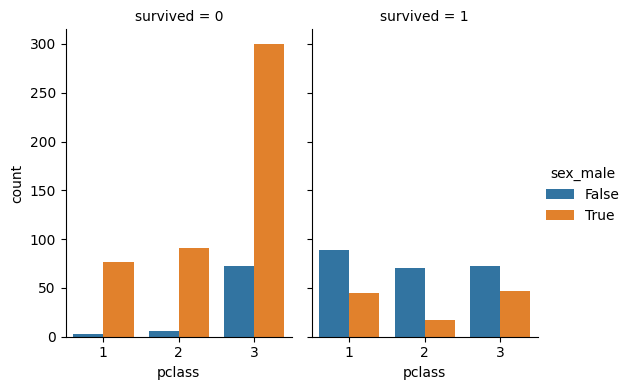

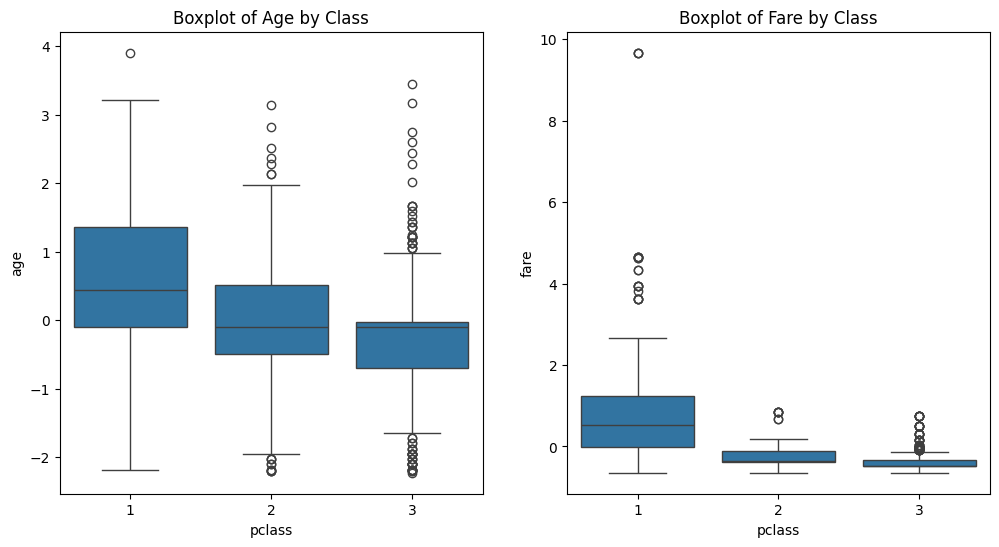

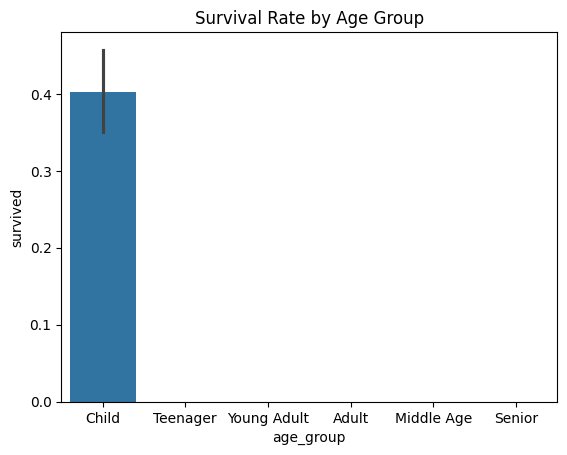

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset from Seaborn
gener_submission = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(gener_submission.head())

# Check for missing values
print("\nMissing values:")
print(gener_submission.isnull().sum())

# Fill missing values for 'age' with median
gener_submission['age'] = gener_submission['age'].fillna(gener_submission['age'].median())

# Fill missing values for 'embarked' with mode
gener_submission['embarked'] = gener_submission['embarked'].fillna(gener_submission['embarked'].mode()[0])

# Drop 'deck' column as it has too many missing values
gener_submission = gener_submission.drop(columns=['deck'])

# Drop rows with missing values for 'embark_town'
gener_submission = gener_submission.dropna(subset=['embark_town'])

# Convert categorical variables to numeric
gener_submission = pd.get_dummies(gener_submission, columns=['sex', 'embarked'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
gener_submission[['age', 'fare']] = scaler.fit_transform(gener_submission[['age', 'fare']])

print("\nDataset after cleaning:")
print(gener_submission.info())

print("\nDescriptive Statistics:")
print(gener_submission.describe())

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(gener_submission.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(gener_submission)
plt.show()

# Survival Rate by Class and Gender
sns.catplot(x='pclass', hue='sex_male', col='survived', data=gener_submission, kind='count', height=4, aspect=0.7)
plt.show()

# Boxplot of Age and Fare
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='pclass', y='age', data=gener_submission)
plt.title('Boxplot of Age by Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='pclass', y='fare', data=gener_submission)
plt.title('Boxplot of Fare by Class')

plt.show()

# Survival Rate by Age Group
gener_submission['age_group'] = pd.cut(gener_submission['age'], bins=[0, 12, 18, 25, 35, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

sns.barplot(x='age_group', y='survived', data=gener_submission)
plt.title('Survival Rate by Age Group')
plt.show()
